<a href="https://colab.research.google.com/github/samehra/LiveTraffic/blob/main/CaptureLiveTraffic_caltrans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming started. Press 'Ctrl + C' to stop.


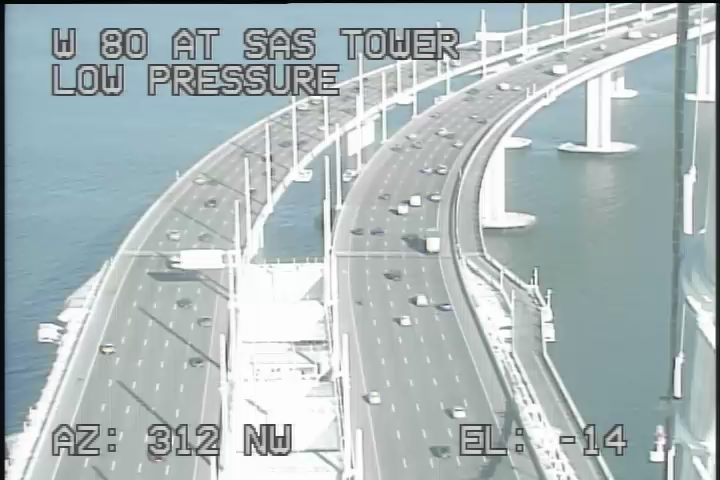

Frame saved: /content/liveTraffic/frames/1733264691.jpg


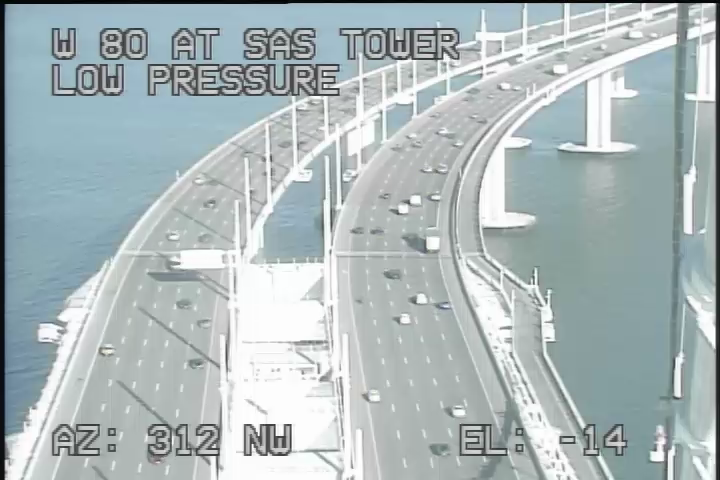

Frame saved: /content/liveTraffic/frames/1733264791.jpg

Streaming stopped.


In [4]:
import cv2
from google.colab.patches import cv2_imshow
import time
import os

# Use the playlist URL
m3u8_url = "https://wzmedia.dot.ca.gov/D4/W80_at_SAS_Tower.stream/playlist.m3u8"
save_folder = "/content/liveTraffic/frames/"

# Create a folder to save frames

def process_live_feed(video_url, frame_rate=1):
    """
    Captures frames from a live traffic feed at a specific frame rate.

    Args:
        video_url (str): URL of the HLS (.m3u8) video stream.
        frame_rate (int): Number of frames to capture per second.
    """
    # Initialize video capture for the HLS stream
    cap = cv2.VideoCapture(video_url)
    if not cap.isOpened():
        print("Error: Unable to access the video stream.")
        return

    print("Streaming started. Press 'Ctrl + C' to stop.")

    # Calculate the time interval for frame capture
    interval = 1 / frame_rate

    try:
        while True:
            start_time = time.time()

            # Read a frame
            ret, frame = cap.read()
            if not ret:
                print("Error: Failed to read from the stream.")
                break

            # Display the frame (optional)
            # cv2.imshow("Traffic Feed", frame)
            cv2_imshow(frame)

            # Save the frame to a local directory
            timestamp = int(time.time())
            frame_filename = f"{save_folder}{timestamp}.jpg"
            os.makedirs(save_folder, exist_ok=True)
            cv2.imwrite(frame_filename, frame)
            print(f"Frame saved: {frame_filename}")

            # Wait for the next frame
            elapsed = time.time() - start_time
            time.sleep(max(0, interval - elapsed))

            # Exit if 'q' is pressed
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    except KeyboardInterrupt:
        print("\nStreaming stopped.")
    finally:
        # Release resources
        cap.release()
        cv2.destroyAllWindows()

# Run the live feed processing
process_live_feed(m3u8_url, frame_rate=0.01)

In [1]:
!pwd

/content
